<a href="https://colab.research.google.com/github/ahkswarun/CodeClauseInternship_Personality-Prediction-System-via-CV-Analysis/blob/main/Personality_Prediction_System_via_CV_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/python/mbti_1.csv')

In [ ]:
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


Text(0, 0.5, 'OCCURRENCES')

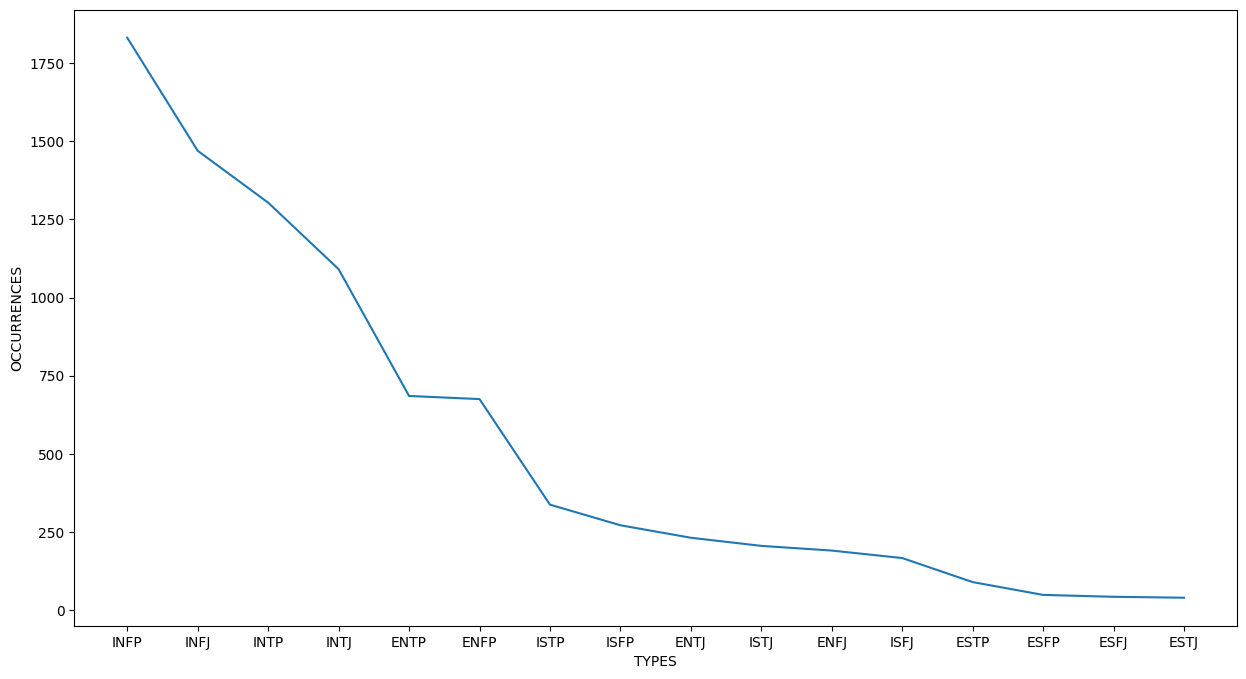

In [ ]:
count=data['type'].value_counts()

plt.figure(figsize=(15,8))
sn.lineplot(data=count)
plt.xlabel('TYPES')
plt.ylabel('OCCURRENCES')

In [ ]:
def types(row):
  x=row['type']

  I=0;N=0;T=0;J=0

  if x[0] == 'I' : I=1
  elif x[0] == 'E': I=0
  else: print('IE incorrect')

  if x[1] == 'N': N=1
  elif x[1] == 'S': N=0
  else: print('NS incorrect')

  if x[2] == 'T': T=1
  elif x[2] == 'F': T=0
  else: print('TF incorrect')

  if x[3] == 'J': J=1
  elif x[3] == 'P': J=0
  else: print('JP incorrect')
  return pd.Series({'IE':I,'NS':N,'TF':T,'JP':J})


data = data.join(data.apply (lambda row: types(row),axis=1))
data

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,1,0,0,0
8671,ENFP,'So...if this thread already exists someplace ...,0,1,0,0
8672,INTP,'So many questions when i do these things. I ...,1,1,1,0
8673,INFP,'I am very conflicted right now when it comes ...,1,1,0,0


In [ ]:
print(data['IE'].value_counts()[0],'/',data['IE'].value_counts()[1])
print(data['NS'].value_counts()[0],'/',data['NS'].value_counts()[1])
print(data['TF'].value_counts()[0],'/',data['TF'].value_counts()[1])
print(data['JP'].value_counts()[0],'/',data['JP'].value_counts()[1])

1999 / 6676
1197 / 7478
4694 / 3981
5241 / 3434


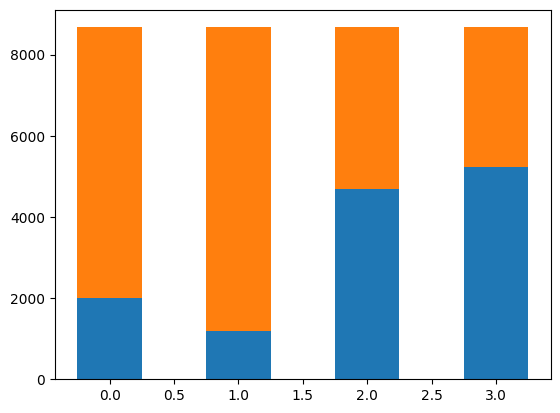

In [ ]:
n=4

bot = (data['IE'].value_counts()[0],data['NS'].value_counts()[0],data['TF'].value_counts()[0],data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1],data['NS'].value_counts()[1],data['TF'].value_counts()[1],data['JP'].value_counts()[1])

ind = np.arange(n)
width = 0.5

p1= plt.bar(ind,bot,width)
p2=plt.bar(ind,top,width,bottom=bot)


<Axes: title={'center': 'Pearson Features Correlation'}>

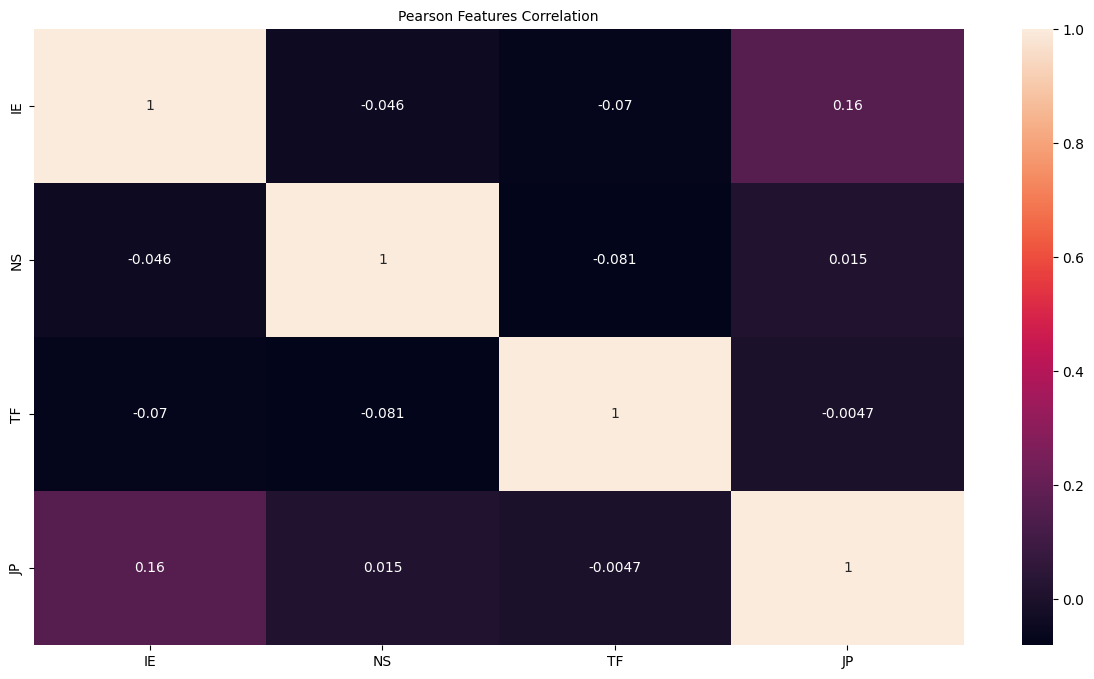

In [ ]:
corr= data[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(15,8))
plt.title('Pearson Features Correlation',size=10)
sn.heatmap(corr,annot=True)

In [ ]:
b={'I':0,'E':1,'N':0,'S':1,'F':0,'T':1,'J':0,'P':1}
blist=[{0:'I',1:'E'},{0:'N',1:'S'},{0:'F',1:'T'},{0:'J',1:'P'}]

def translate_personality(personality):
  return [b[i] for i in personality]

def translate_back(personality):
  s = ""
  for i,l in enumerate(personality):
    s += blist[i][l]
  return s

d=data.head()
personality_bin = np.array([translate_personality(p) for p in d.type])
personality_bin

array([[0, 0, 0, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [1, 0, 1, 0]])

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

type_list = ['INFJ','ENTP','INTP','INTJ','ENTJ','ENFJ','INFP','ENFP','ISFP','ISTP','ISFJ','ISTJ','ESTP','ESFP','ESTJ','ESFJ']
type_list = [x.lower() for x in type_list]

stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

cached = stopwords.words("english")

def preprocess(data,removewords=True,removeprofile=True):
    lpersonality = []
    lposts = []
    datalen=len(data)
    i=0

    for row in data.iterrows():
      i+=1
      if(i % 500 == 0 or i == 1 or i == datalen):
        print(" %s of %s rows" % (i,datalen))

      #remove and clean comments
      posts= row[1].posts
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ',posts)
      temp = re.sub("[^a-zA-Z]"," ",temp)
      temp = re.sub(' +',' ',temp).lower()
      if removewords:
        temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cached])
      else:
        temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

      if removeprofile:
        for t in type_list:
          temp = temp.replace(t,"")

      labelized=translate_personality(row[1].type)
      lpersonality.append(labelized)
      lposts.append(temp)

    lposts=np.array(lposts)
    lpersonality=np.array(lpersonality)
    return lposts,lpersonality

In [ ]:
lposts,lpersonality=preprocess(data,removewords=True)

 1 of 8675 rows
 500 of 8675 rows
 1000 of 8675 rows
 1500 of 8675 rows
 2000 of 8675 rows
 2500 of 8675 rows
 3000 of 8675 rows
 3500 of 8675 rows
 4000 of 8675 rows
 4500 of 8675 rows
 5000 of 8675 rows
 5500 of 8675 rows
 6000 of 8675 rows
 6500 of 8675 rows
 7000 of 8675 rows
 7500 of 8675 rows
 8000 of 8675 rows
 8500 of 8675 rows
 8675 of 8675 rows


In [ ]:
lposts.shape,lpersonality.shape

((8675,), (8675, 4))

In [ ]:
lposts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [ ]:
lpersonality[0]

array([0, 0, 0, 0])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

cntizer = CountVectorizer(analyzer='word',max_features=1500,
                          tokenizer=None,preprocessor=None,
                          stop_words=None,max_df=0.7,min_df=0.1)

x=cntizer.fit_transform(lposts)

tfizer=TfidfTransformer()

x_tfidf=tfizer.fit_transform(x).toarray()

In [ ]:
feature=list(enumerate(cntizer.get_feature_names_out()))
feature

[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'actual'),
 (9, 'actually'),
 (10, 'add'),
 (11, 'admit'),
 (12, 'advice'),
 (13, 'afraid'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ah'),
 (18, 'almost'),
 (19, 'alone'),
 (20, 'along'),
 (21, 'already'),
 (22, 'although'),
 (23, 'amazing'),
 (24, 'amount'),
 (25, 'angry'),
 (26, 'animal'),
 (27, 'annoying'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apparently'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'argument'),
 (40, 'around'),
 (41, 'art'),
 (42, 'ask'),
 (43, 'asked'),
 (44, 'asking'),
 (45, 'aspect'),
 (46, 'assume'),
 (47, 'attention'),
 (48, 'attracted'),
 (49, 'avatar'),
 (50, 'avoid'),
 (51, 'aware'),
 (52, 'away'),
 (53, 'awesome'),
 (54, 'awkward'),
 (55, 'baby'),
 (56, 'back'),
 (57, 'bad'),
 (58, 'based'),
 (59, 'basi

In [ ]:
x_tfidf.shape

(8675, 791)

In [ ]:
x_tfidf[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08042209,
       0.06830218, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10331537, 0.        ,
       0.04973404, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10984584, 0.        , 0.        , 0.        , 0.08642509,
       0.        , 0.        , 0.10488948, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05188886, 0.06824736,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
type_indicators = ["IE: Introversion (I) / Extroversion (E)",
                   "NS: Intuition (N) - Sensing (S)",
                   "FT: Feeling (F) - Thinking (T)",
                   "JP: Judging (J) - Perceiving (P)" ]

for l in range(len(type_indicators)):
  print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) - Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) - Perceiving (P)


In [ ]:
translate_back(lpersonality[0,:])
lpersonality[0,:]

array([0, 0, 0, 0])

In [67]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x=x_tfidf

for l in range(len(type_indicators)):
  print("%s"%(type_indicators[l]))

  y=lpersonality[:,l]

  seed = 7
  size = 0.4
  x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=size,random_state=seed)

  model=XGBClassifier()
  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)
  predictions = [round(value) for value in y_pred]

  accuracy=accuracy_score(y_test,predictions)
  print("%s accuracy: %.2f%%" %(type_indicators[l],accuracy * 100.0))

IE: Introversion (I) / Extroversion (E)
IE: Introversion (I) / Extroversion (E) accuracy: 76.80%
NS: Intuition (N) - Sensing (S)
NS: Intuition (N) - Sensing (S) accuracy: 86.60%
FT: Feeling (F) - Thinking (T)
FT: Feeling (F) - Thinking (T) accuracy: 71.87%
JP: Judging (J) - Perceiving (P)
JP: Judging (J) - Perceiving (P) accuracy: 62.71%


monitor performance and early stopping


In [ ]:
for l in range(len(type_indicators)):
  print("%s " %(type_indicators[l]))

  y=lpersonality[:,l]

  seed=7
  size=0.33
  x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=size,random_state=seed)

  model=XGBClassifier()
  eval = [(x_test,y_test)]
  model.fit(x_train,y_train,early_stopping_rounds=10,eval_metric="logloss",eval_set=eval,verbose=True)

  y_pred = model.predict(x_test)
  predictions =[round(value) for value in y_pred]

  accuracy = accuracy_score(y_test,predictions)
  print("%s accuracy: %.3f%%" %(type_indicators[l],accuracy*100.0))

IE: Introversion (I) / Extroversion (E) 


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.60846
[1]	validation_0-logloss:0.56733
[2]	validation_0-logloss:0.54272
[3]	validation_0-logloss:0.53047
[4]	validation_0-logloss:0.52343
[5]	validation_0-logloss:0.51792
[6]	validation_0-logloss:0.51321
[7]	validation_0-logloss:0.51397
[8]	validation_0-logloss:0.51347
[9]	validation_0-logloss:0.51266
[10]	validation_0-logloss:0.51036
[11]	validation_0-logloss:0.51225
[12]	validation_0-logloss:0.51369
[13]	validation_0-logloss:0.51236
[14]	validation_0-logloss:0.51188
[15]	validation_0-logloss:0.51248
[16]	validation_0-logloss:0.51100
[17]	validation_0-logloss:0.51053
[18]	validation_0-logloss:0.51044
[19]	validation_0-logloss:0.51093
[20]	validation_0-logloss:0.51250
IE: Introversion (I) / Extroversion (E) accuracy: 77.471%
NS: Intuition (N) - Sensing (S) 


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.55702
[1]	validation_0-logloss:0.48679
[2]	validation_0-logloss:0.44576
[3]	validation_0-logloss:0.41969
[4]	validation_0-logloss:0.40669
[5]	validation_0-logloss:0.39926
[6]	validation_0-logloss:0.39390
[7]	validation_0-logloss:0.39172
[8]	validation_0-logloss:0.38809
[9]	validation_0-logloss:0.38767
[10]	validation_0-logloss:0.38759
[11]	validation_0-logloss:0.38908
[12]	validation_0-logloss:0.38807
[13]	validation_0-logloss:0.38682
[14]	validation_0-logloss:0.38983
[15]	validation_0-logloss:0.39438
[16]	validation_0-logloss:0.39508
[17]	validation_0-logloss:0.39565
[18]	validation_0-logloss:0.39478
[19]	validation_0-logloss:0.39568
[20]	validation_0-logloss:0.39807
[21]	validation_0-logloss:0.39927
[22]	validation_0-logloss:0.40111
[23]	validation_0-logloss:0.40089
NS: Intuition (N) - Sensing (S) accuracy: 85.854%
FT: Feeling (F) - Thinking (T) 


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66920
[1]	validation_0-logloss:0.65176
[2]	validation_0-logloss:0.63873
[3]	validation_0-logloss:0.62824
[4]	validation_0-logloss:0.62181
[5]	validation_0-logloss:0.61586
[6]	validation_0-logloss:0.60997
[7]	validation_0-logloss:0.60115
[8]	validation_0-logloss:0.59526
[9]	validation_0-logloss:0.59093
[10]	validation_0-logloss:0.59013
[11]	validation_0-logloss:0.58937
[12]	validation_0-logloss:0.58451
[13]	validation_0-logloss:0.58293
[14]	validation_0-logloss:0.58050
[15]	validation_0-logloss:0.57901
[16]	validation_0-logloss:0.57771
[17]	validation_0-logloss:0.57638
[18]	validation_0-logloss:0.57493
[19]	validation_0-logloss:0.57427
[20]	validation_0-logloss:0.57442
[21]	validation_0-logloss:0.57426
[22]	validation_0-logloss:0.57578
[23]	validation_0-logloss:0.57628
[24]	validation_0-logloss:0.57666
[25]	validation_0-logloss:0.57545
[26]	validation_0-logloss:0.57565
[27]	validation_0-logloss:0.57486
[28]	validation_0-logloss:0.57626
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66832
[1]	validation_0-logloss:0.65648
[2]	validation_0-logloss:0.65019
[3]	validation_0-logloss:0.64751
[4]	validation_0-logloss:0.64782
[5]	validation_0-logloss:0.64693
[6]	validation_0-logloss:0.64563
[7]	validation_0-logloss:0.64630
[8]	validation_0-logloss:0.64631
[9]	validation_0-logloss:0.64806
[10]	validation_0-logloss:0.64787
[11]	validation_0-logloss:0.64671
[12]	validation_0-logloss:0.64708
[13]	validation_0-logloss:0.64661
[14]	validation_0-logloss:0.64901
[15]	validation_0-logloss:0.64942
[16]	validation_0-logloss:0.64977
JP: Judging (J) - Perceiving (P) accuracy: 63.709%


show feature importance plot and list for the first indicator

<Figure size 1500x800 with 0 Axes>

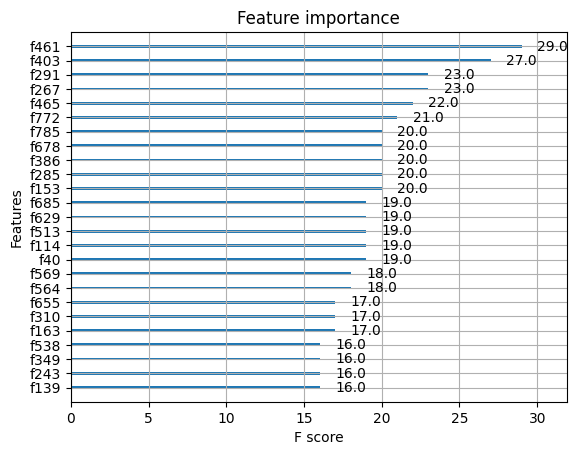

<Figure size 1500x800 with 0 Axes>

In [71]:
from xgboost import plot_importance

y=lpersonality[:,0]

model=XGBClassifier()
model.fit(x,y)

ax=plot_importance(model,max_num_features=25)

fig=ax.figure
plt.figure(figsize=(15,8))

In [ ]:
features = sorted(list(enumerate(model.feature_importances_)),key=lambda x:x[1],reverse=True)
for f in features[0:25]:
  print("%d\t%f\t%s"%(f[0],f[1],cntizer.get_feature_names_out()[f[0]]))

222	0.004595	expect
551	0.004560	quiet
122	0.004260	computer
93	0.004210	case
461	0.004159	ne
396	0.003930	listening
690	0.003837	terrible
477	0.003657	nt
438	0.003622	middle
112	0.003487	college
292	0.003386	haha
80	0.003349	boyfriend
434	0.003345	mention
291	0.003298	guy
428	0.003248	meant
249	0.003232	figure
329	0.003190	hug
337	0.003139	image
313	0.003133	hey
581	0.003129	run
719	0.003114	truth
351	0.003087	introvert
235	0.003071	family
244	0.003042	fellow
53	0.002993	awesome


In [ ]:
default=model.get_xgb_params()
default

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
def plot(cm,classes,normalize=False,title="Confusion matrix"):
  plt.imshow(cm,interpolation='nearest')
  plt.title(title)
  plt.colorbar()
  tick=np.arange(len(classes))
  plt.xticks(tick,classes,rotation=45)
  plt.yticks(tick,classes)

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')

  print(cm)

  thresh = cm.max()/2

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')
  plt.show()

IE: Introversion (I) / Extroversion (E) 
IE: Introversion (I) / Extroversion (E) accuracy: 77.750611%
confusion matrix, without normalization
[[2214   15]
 [ 622   12]]


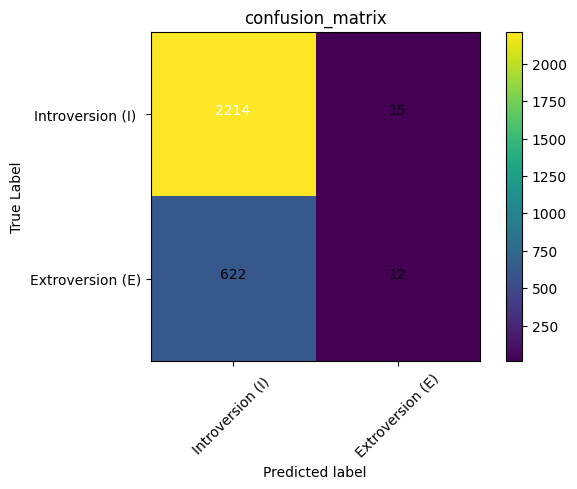

NS: Intuition (N) - Sensing (S) 
NS: Intuition (N) - Sensing (S) accuracy: 86.028641%
confusion matrix, without normalization
[[2463    0]
 [ 400    0]]


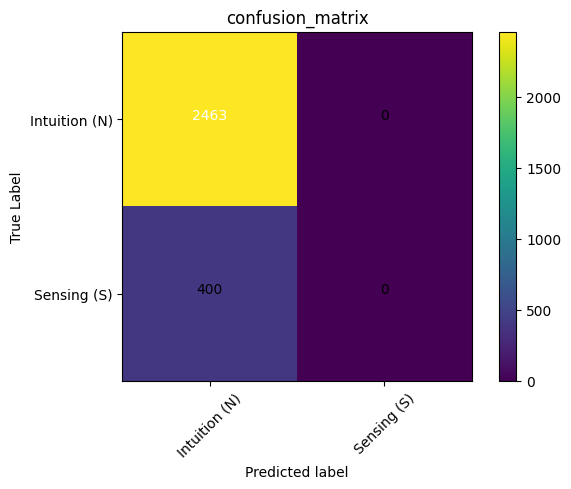

FT: Feeling (F) - Thinking (T) 
FT: Feeling (F) - Thinking (T) accuracy: 60.705554%
confusion matrix, without normalization
[[1122  432]
 [ 693  616]]


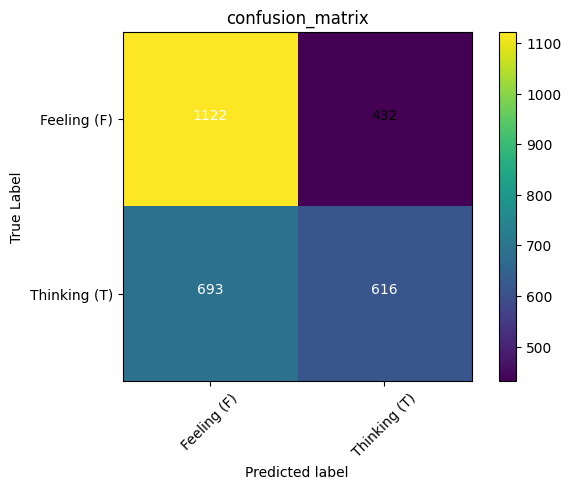

JP: Judging (J) - Perceiving (P) 
JP: Judging (J) - Perceiving (P) accuracy: 63.709396%
confusion matrix, without normalization
[[ 256  863]
 [ 176 1568]]


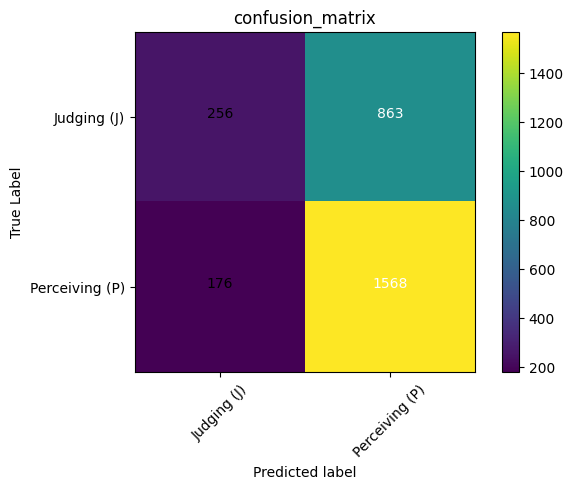

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import re

param={}

param['n_estimators']=200
param['n_estimators'] = 2
param['max_depth'] = 2
param['nthread'] =8
param['learning_rate']=0.2

for l in range(len(type_indicators)):
  print("%s " %(type_indicators[l]))

  y=lpersonality[:,l]

  seed=7
  size=0.33
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=size,random_state=seed)

  model=XGBClassifier(**param)
  model.fit(x_train,y_train)

  y_pred = model.predict(x_test)
  predictions=[round(value) for value in y_pred]

  accuracy = accuracy_score(y_test,predictions)
  print('%s accuracy: %2f%%' % (type_indicators[l],accuracy*100))

  cm=confusion_matrix(y_test,predictions)
  cm_class = re.split('/ | - |: | -',type_indicators[l])
  plot(cm,[cm_class[1],cm_class[2]],title="confusion_matrix")

In [ ]:
my_posts = """Getting started with data science and applying machine learning has never been as simple as it is now. There are many free and paid online tutorials and courses out thc
Awesome SAWS monitoring introduction.
HPE Software (now @AicroFocusSK) won the platinum reader's choice TAKARDS 2017 in the new category ecloufinitoring
Certified as AWS Certified Solutions Architect
Hi, please have a look at my Udacity interview about online learning and machine learning,
very interesting to see the lessons learnt during the HP Operations Orchestration to CloudS1ang journey. http://bit.ly/IX041ci
I cane across a post on devopsdigest.com and need your input: "70% DevOps organizations unhappy with DevOps Yonitoring Tools"
In a similar investigation I found out that many DevOps organizations use several mnitoring tools in parallel. Senu, Nagios, Logstach and SaaS offerings such as DataDog or signalFX t
Sure, there are comercial tools on the market for exactly this use case but these tools are not necessarily optimized for Devops.
so, here my question to you: In your DevOps project, have you encountered that the lack Of consolidation Of alerts and status is a real issue? If yes, how did you approach the problen
You will probably hear more and mre about Chatops - at conferences, DevOps meet-ups or from your co-mrker at the coffee station. Chatops is a term and concept coined by GitHL
now the question is: why and how would I, as an ops•focused engineer, i.lement and use Chatops in my organization? The next question then is: Hoed to include my tools into the chat cc
Let's begin by having a look at a use case. The Closed Looped Incidents process (CLIP) can be rejuvenated with Chatops. The work from the incident detection runs through mnitoring ur
In this blog post, I am going to describe and share my experience with deploying HP Operations Manager i 10.0 04i) on HP Helion Public Cloud. An Infrastructure as a Service platform
"""
mydata=pd.DataFrame(data={'type':['INFJ'],'posts':[my_posts]})

myposts,dummy=preprocess(mydata,removewords=True)

myx=cntizer.transform(myposts)
myxtfidf=tfizer.transform(myx).toarray()

 1 of 1 rows


In [ ]:
param={}

param['n_estimators']=200
param['n_estimators'] = 2
param['max_depth'] = 2
param['nthread'] =8
param['learning_rate']=0.2

results=[]

for l in range(len(type_indicators)):
  print("%s " %(type_indicators[l]))

  y=lpersonality[:,l]

  seed=7
  size=0.33
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=size,random_state=seed)

  model=XGBClassifier(**param)
  model.fit(x_train,y_train)

  y_pred=model.predict(myxtfidf)
  results.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) 
NS: Intuition (N) - Sensing (S) 
FT: Feeling (F) - Thinking (T) 
JP: Judging (J) - Perceiving (P) 


In [ ]:
translate_back(results)

'INTP'